## Wild Blueberry Yield Prediction

### In any Machine Learning projects, there are 3 crucial steps need to be involved
1. Collecting Data
2. Training the Model
3. Evaluating the Model
* There are several other steps involved to develop the model.

In [26]:
## Importing the Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [27]:
## Let's get the Data
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [28]:
Train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [29]:
Test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [30]:
len(Train),len(Test)

(15289, 10194)

In [31]:
print("Important....!");

"""
    Since this dataset has been taken out from the kaggle competition, 
    there is no label for testing data, we need to predict the values
    and submit the values to the kaggle, it will provide the information
    of how accurate our model is performing.
    
    Instead we can also split the training set into 80:20 ratio and form 
    a new train and test dataset and also work on it to analyse our model
    performance..
    
"""

print("")

Important....!



## Now let's dive into the project

### Cleaning Data

In [32]:
# Let's see what type of features are there
Train.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [33]:
# Let's just drop this id column which is adding duplication
Train.drop("id",axis=1,inplace=True)
Test.drop("id",axis=1,inplace=True)

In [34]:
# Let's check the types of data
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [35]:
#avoid those print statements
print()
"""
    There is no non-numeric data to deal with, we can easily train our model with
    this type of data
"""
print()

In [36]:
# Let's check if there are any missing values

Train.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [37]:
Test.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [38]:
#avoid those print statements
print()
"""
    There is no missing data to fill, we can easily train our model with
    this dataset
"""
print()

In [39]:
Train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Visualizing The Features

In [40]:
# Let's create a plot showing how the values of a feature are distributed
import matplotlib.pyplot as plt
%matplotlib inline


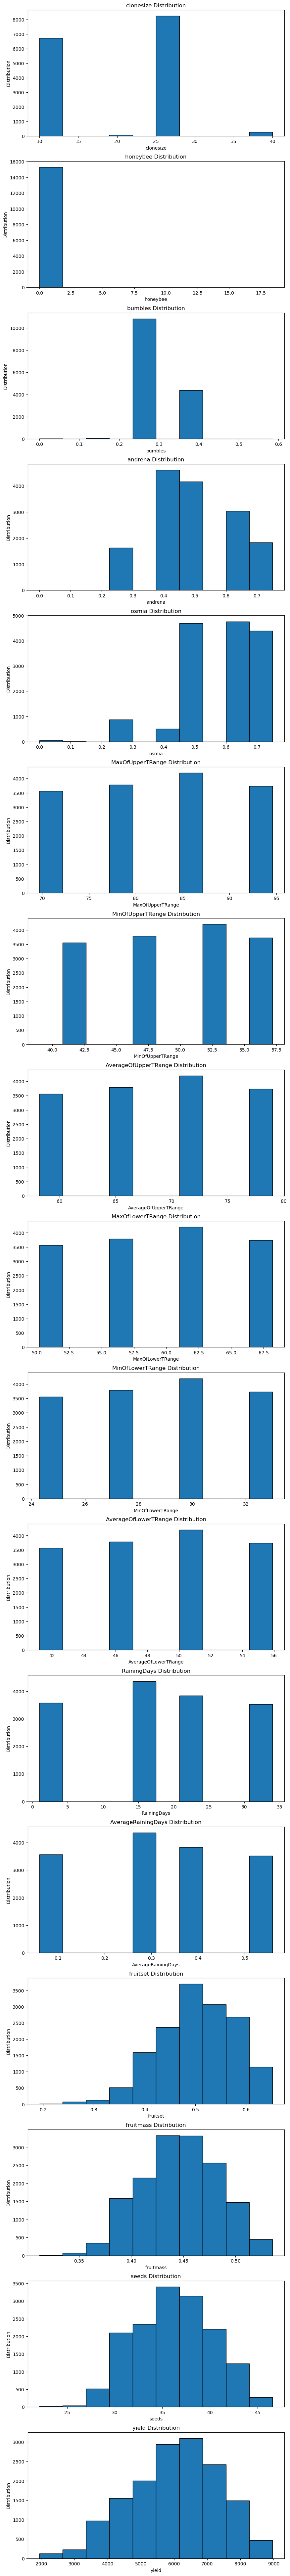

In [41]:
fig,ax = plt.subplots(nrows=17,ncols=1,figsize=(10,100))
i=0
for name,content in Train.items():
    ax[i].hist(content,edgecolor="black")
    ax[i].set_ylabel("Distribution")
    ax[i].set_xlabel(name)
    ax[i].set_title(f"{name} Distribution")
    i = i+1
    

## Let's get the Model

In [42]:
# Let's split the train dataset into a seperate test and train
from sklearn.model_selection import train_test_split

X = Train.drop("yield",axis=1)
Y = Train["yield"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
len(X_train),len(Y_train)

(12231, 12231)

In [44]:
len(X_test),len(Y_test)

(3058, 3058)

## Logistic Regression


In [48]:
np.random.seed(42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Model_LR = LinearRegression()
Model_LR.fit(X_train,Y_train)

LinearRegression()

In [50]:
Model_LR.score(X_train,Y_train)

0.8093480080010431

In [51]:
Y_preds = Model_LR.predict(X_test)

In [67]:
SCORE_LR=mean_absolute_error(Y_test,Y_preds)

## RandomForestRegressor

### The score method of the models gives the R-Squared Score, which is statistical 
### measure to evaluate the model performance

In [53]:
from sklearn.ensemble import RandomForestRegressor

Model_RFR = RandomForestRegressor()
Model_RFR.fit(X_train,Y_train)


RandomForestRegressor()

In [55]:
Model_RFR.score(X_train,Y_train)

0.9732610554854766

In [70]:
Y_preds = Model_RFR.predict(X_test)
SCORE_RFR=mean_absolute_error(Y_test,Y_preds)

In [71]:
Model_RFR.score(X_test,Y_test)

0.818838473599955

## Gradient Boosting Regressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

Model_GBR = GradientBoostingRegressor()
Model_GBR.fit(X_train,Y_train)

GradientBoostingRegressor()

In [62]:
Model_GBR.score(X_train,Y_train)

0.8335570978191725

In [64]:
Y_preds = Model_GBR.predict(X_test)

In [65]:
SCORE_GBR = mean_absolute_error(Y_test,Y_preds)

In [66]:
SCORE_GBR

348.69264501160177

## CONCLUSION

In [72]:
print("Linear Regressor MAE",SCORE_LR)
print("Random Forest Regressor MAE",SCORE_RFR)
print("Gradient Boosting Regressor",SCORE_GBR)

Linear Regressor MAE 348.69264501160177
Random Forest Regressor MAE 357.2674926502649
Gradient Boosting Regressor 348.69264501160177


### We can come to the conclusion that :
* Since the model Linear Regressor and Gradient Boosting Regressor are per